# Power spectral density

When analysing wind turbine responses, we are often very interested to see if there are any frequencies that dominate in a signal. This can indicate resonance or other aeroelastic instabilities that will cause issues with the turbine performance. To analyse the frequency content of a signal, we use a power spectral density (PSD).  

We will not go into detail into signal processing (although it is an important concept!). Instead, we provide here the equation for the one-sided PSD:  
\begin{equation}
    S[f] = \frac{2|X[f]|^2}{\Delta f}
\end{equation}
where $X(f)$ is the discrete Fourier transform of the time vector and $\Delta f=1/T$ is called the frequency resolution.
Note that the total simulation time $T$ is calculated assuming the signal repeats after it ends.
In other words, if your time vector starts at 0, ends at 599 and has a time step of 1 s, then $T$ would be 600 seconds.
Lastly, because our signals are real, we only need the first half of the FFT vector, because the other half is the complex conjugate of the first half.  

Besides being useful for analysing frequencies, the continuous PSD is also related to the variance in an interesting way:  
\begin{equation}
    \sigma_x^2 = \int_0^\infty S_x(f) df.
\end{equation}
For a discrete PSD, we can approximate the integral on the right-hand side using numerical integration. One easy numerical integration is trapezoidal integration.  

**Note for Python users!** The `np.fft` module includes the standard `fft` function, which is the same function as in Matlab, but it also has two very useful functions for the FFT of real signals:  
  * ``np.fft.rfftfreq(n, d=1.0)``. Give this function the number of time steps and the value for $\Delta t$ and it will return the array of frequencies that correspond to the one-sided PSD.  
  * ``np.fft.rfft(x, ...)``. Give this function your time vector, and it will calculate the FFT and return the first half of the Fourier vector, which is all you need for real signals.  


### Exercises for the reader

  1. Load the results file (perhaps reusing your code from the previous tutorial).
  2. Calculate the one-sided PSD and corresponding frequency array from one of the signals from your choice.
  3. Using trapezoidal integration, verify that the integral of the one-sided PSD is equal to the variance of the signal.
  4. Plot the PSD in a method of your choice and identify at which frequency peaks occur, if you see any.
  5. **Bonus exercise!** Calculate the PSD for multiple signals and make a plot comparing their PSDs. Consider which frequencies occur in which signal, and hypothesize why.

### Answers to the exercises

#### Exercise 1

In [1]:
from turbie import load_results

# load data
path = 'res_12_ms_TI_0.1.txt'
t, u, x1, x2 = load_results(path)

#### Exercise 2

In [2]:
import numpy as np


def calculate_psd(t, x):
    """Calculate the one-sided power spectral density of a discrete signal.
    Returns:
        f : numpy array of frequencies
        Sx : numpy array of PSD
    """
    # useful values for PSD calculations
    dt = t[1] - t[0]  # time step
    T = t[-1] - t[0] + dt  # total simulation time
    df = 1 / T  # frequency resolution
    f = np.fft.rfftfreq(x.size, dt)  # get one-sided frequency vector

    # calculate PSD of signal
    X = np.fft.rfft(x) / x.size  # one-sided Fourier vector
    X[0] = 0  # remove 0-frequency (mean value)
    Sx = 2 * np.abs(X)**2 / df  # calculate one-sided PSD

    return f, Sx

x = x2  # let's look at the tower response
f, Sx = calculate_psd(t, x)

#### Exercise 3

In [3]:
var_x = np.var(x)
int_Sx = np.trapz(Sx, f)

print(f'Signal variance: {var_x}')
print(f'Integral of S(f): {int_Sx}')

Signal variance: 0.01067777019090909
Integral of S(f): 0.010677770190909092


#### Exercise 4

Based on the plot, there appears to be a peak near 0.25 Hz.

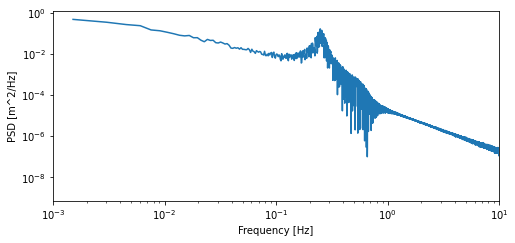

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, clear=True, figsize=(8, 3.5))
ax.loglog(f[1:], Sx[1:])  # skip zero-frequency for plotting
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [m^2/Hz]')
ax.set_xlim([1e-3, 1e1]);  # zoom in to interesting section

#### Exercise 5

There do not appear to be any significant peaks in the wind speed. The tower seems to have a peak near 0.25 Hz, whereas the blades peak near 0.6 Hz.

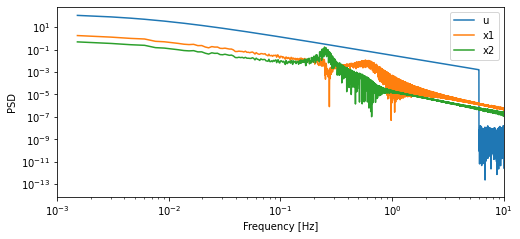

In [5]:
# calculate PSDs and frequency vector
Su = calculate_psd(t, u)[1]
Sx1 = calculate_psd(t, x1)[1]
f, Sx2 = calculate_psd(t, x2)

# make the plot
fig, ax = plt.subplots(1, clear=True, figsize=(8, 3.5))
for S, label in zip([Su, Sx1, Sx2], ['u', 'x1', 'x2']):
    
    ax.loglog(f[1:], S[1:], label=label)  # skip zero frequency
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('PSD')
    ax.set_xlim([1e-3, 1e1]);  # zoom in to interesting section
plt.legend();